In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Chargement des données
df = pd.read_csv('../data/df_venues_processed.csv', sep=';')

# Conversion de la colonne Date en datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Affichage des premières lignes
print("Premières lignes du dataset:")
print(df.head())
print(f"\nNombre de lignes: {len(df)}")
print(f"\nColonnes: {df.columns.tolist()}")

Premières lignes du dataset:
        Date  GLOBAL  D1   D2   D3  D4  jour_ferie.  pont.conge.  holiday  \
0 2022-09-05     240   0  172   55  13            0            0        0   
1 2022-09-06     542   4  336  169  33            0            0        0   
2 2022-09-07     657   1  399  217  40            0            0        0   
3 2022-09-08     607   2  377  180  48            0            0        0   
4 2022-09-09     461   5  300  120  36            0            0        0   

  jour_semaine  Semaine  Annee Annee_et_Semaine  Temp  pluie  autre  \
0        lundi       36   2022      2022 Sem 36    20    3.1      1   
1        mardi       36   2022      2022 Sem 36    17    0.4      0   
2     mercredi       36   2022      2022 Sem 36    17    0.5      1   
3        jeudi       36   2022      2022 Sem 36    15    0.4      1   
4     vendredi       36   2022      2022 Sem 36    15    0.4      1   

   Greve_nationale  SNCF  prof_nationale  Total_reservations  
0                0

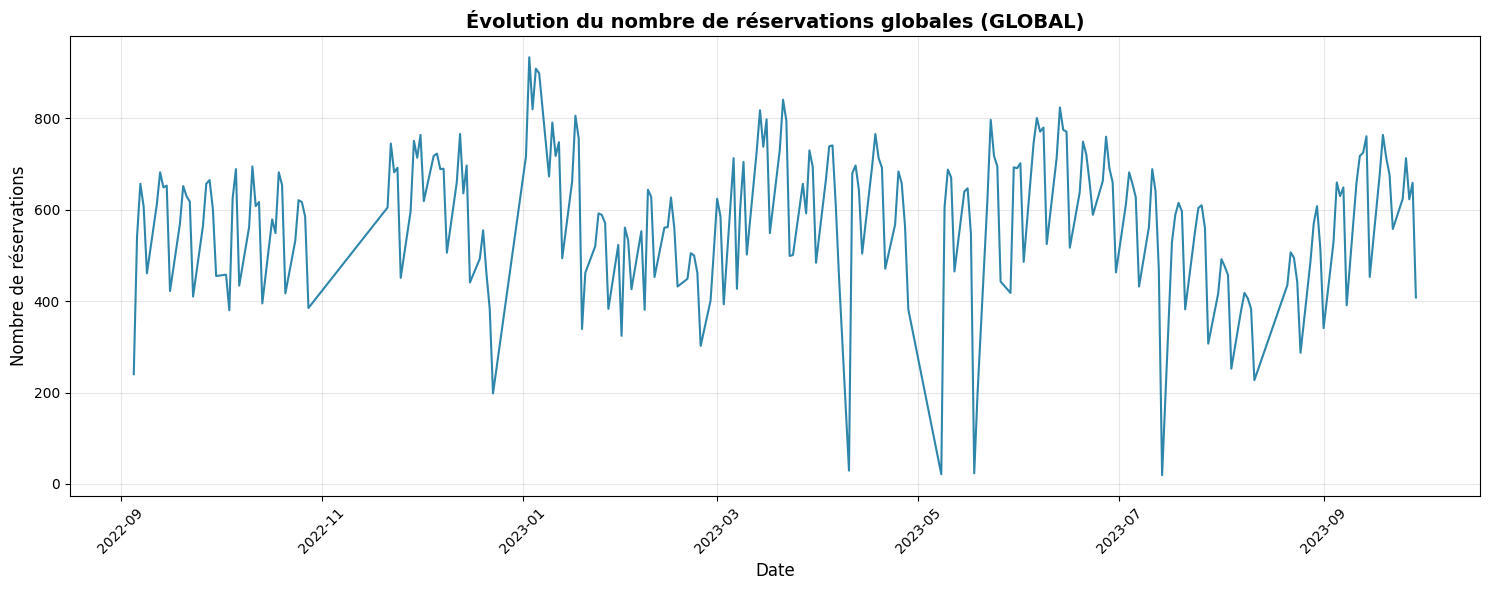

In [3]:
# Visualisation 1: Évolution du nombre de réservations globales au fil du temps
plt.figure(figsize=(15, 6))
plt.plot(df['Date'], df['GLOBAL'], linewidth=1.5, color='#2E86AB')
plt.title('Évolution du nombre de réservations globales (GLOBAL)', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Nombre de réservations', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

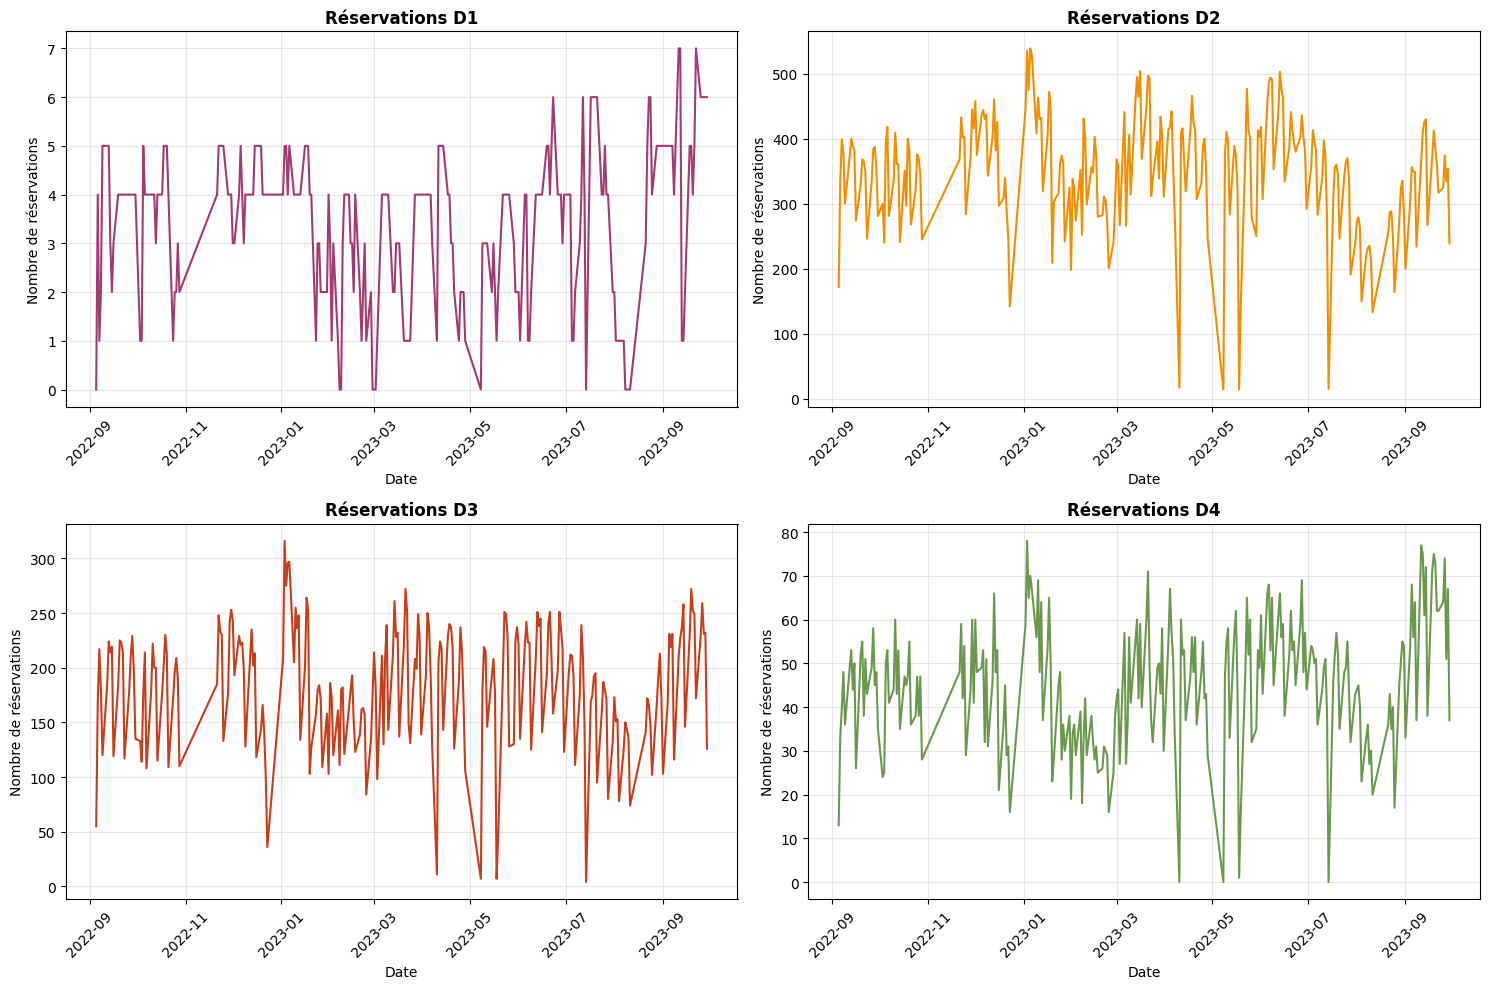

In [4]:
# Visualisation 2: Comparaison des réservations par catégorie (D1-D4)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

categories = ['D1', 'D2', 'D3', 'D4']
colors = ['#A23B72', '#F18F01', '#C73E1D', '#6A994E']

for idx, (cat, color) in enumerate(zip(categories, colors)):
    ax = axes[idx // 2, idx % 2]
    ax.plot(df['Date'], df[cat], linewidth=1.5, color=color)
    ax.set_title(f'Réservations {cat}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Date', fontsize=10)
    ax.set_ylabel('Nombre de réservations', fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

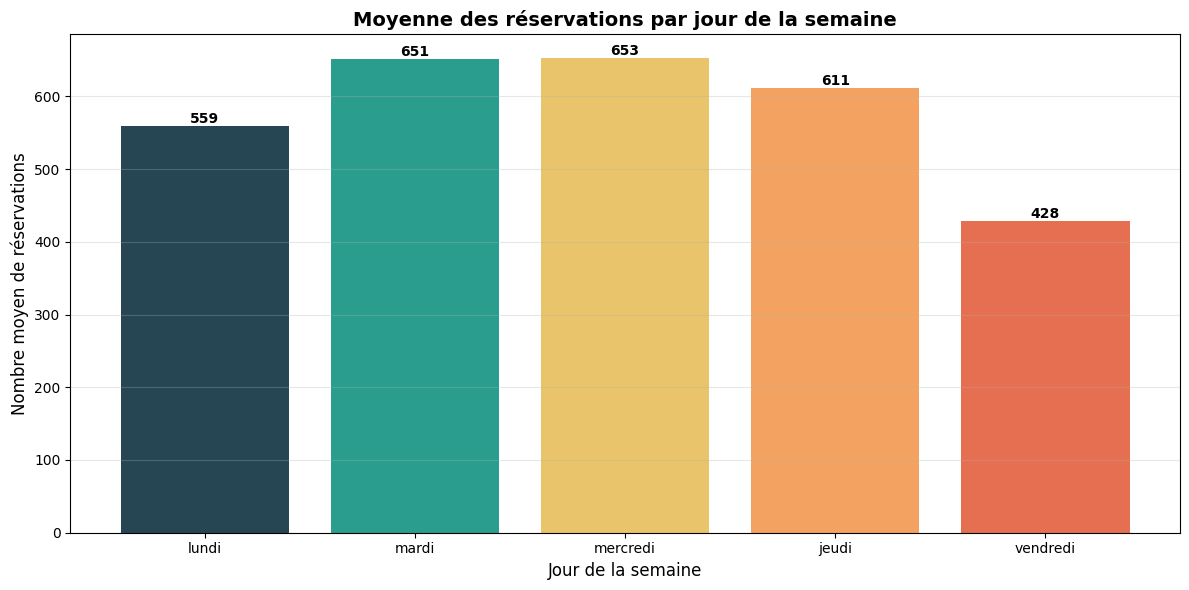

In [5]:
# Visualisation 3: Distribution des réservations par jour de la semaine
reservations_par_jour = df.groupby('jour_semaine')['GLOBAL'].mean().reindex(
    ['lundi', 'mardi', 'mercredi', 'jeudi', 'vendredi']
)

plt.figure(figsize=(12, 6))
bars = plt.bar(reservations_par_jour.index, reservations_par_jour.values, 
               color=['#264653', '#2A9D8F', '#E9C46A', '#F4A261', '#E76F51'])
plt.title('Moyenne des réservations par jour de la semaine', fontsize=14, fontweight='bold')
plt.xlabel('Jour de la semaine', fontsize=12)
plt.ylabel('Nombre moyen de réservations', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')

# Ajout des valeurs au-dessus des barres
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.0f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

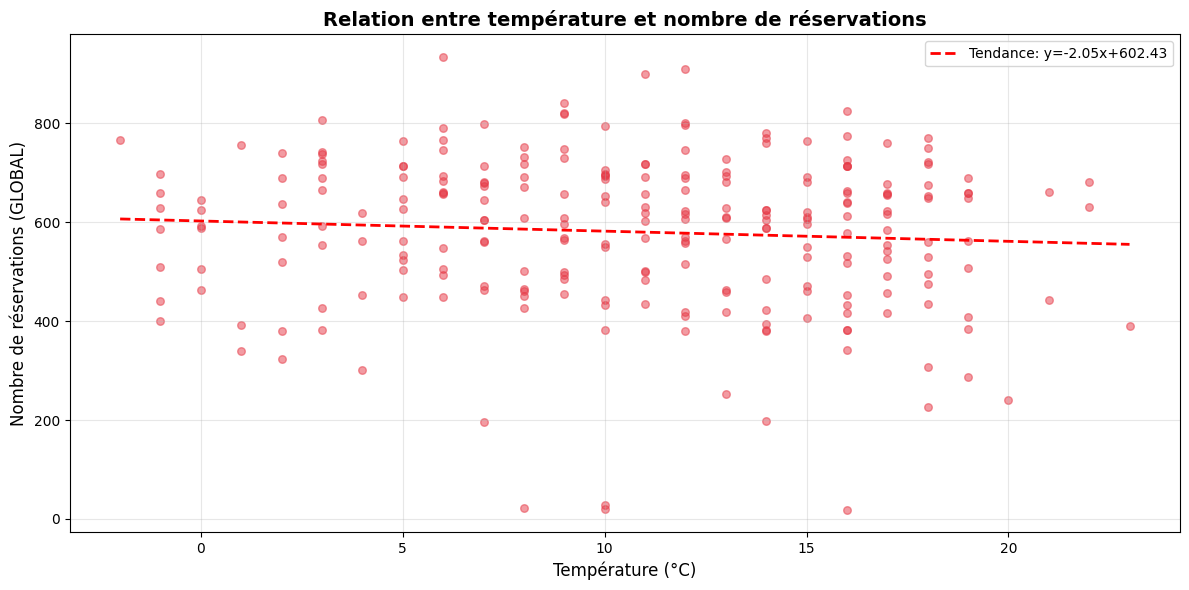

In [6]:
# Visualisation 4: Impact de la température sur les réservations
plt.figure(figsize=(12, 6))
plt.scatter(df['Temp'], df['GLOBAL'], alpha=0.5, s=30, color='#E63946')
plt.title('Relation entre température et nombre de réservations', fontsize=14, fontweight='bold')
plt.xlabel('Température (°C)', fontsize=12)
plt.ylabel('Nombre de réservations (GLOBAL)', fontsize=12)
plt.grid(True, alpha=0.3)

# Ajout d'une ligne de tendance
z = np.polyfit(df['Temp'], df['GLOBAL'], 1)
p = np.poly1d(z)
plt.plot(df['Temp'].sort_values(), p(df['Temp'].sort_values()), 
         "r--", linewidth=2, label=f'Tendance: y={z[0]:.2f}x+{z[1]:.2f}')
plt.legend()
plt.tight_layout()
plt.show()

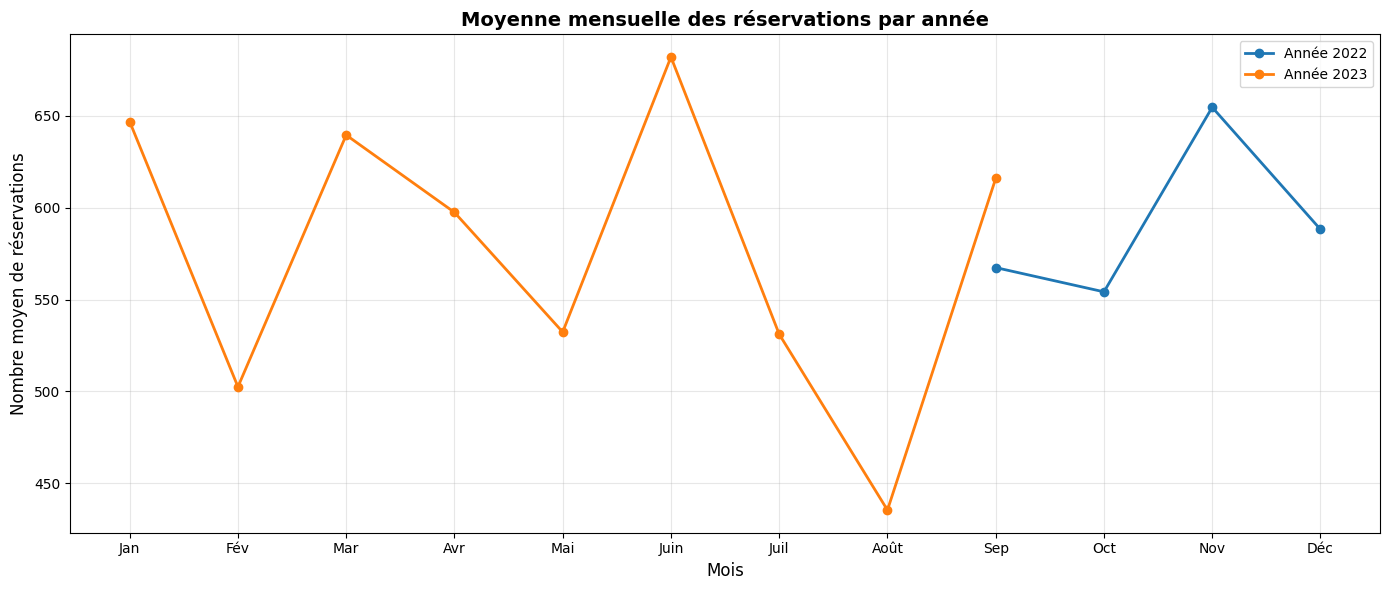

In [7]:
# Visualisation 5: Évolution mensuelle avec comparaison par année
df['Mois'] = df['Date'].dt.month
df['Mois_Nom'] = df['Date'].dt.strftime('%b')

reservations_mensuelles = df.groupby(['Annee', 'Mois'])['GLOBAL'].mean().reset_index()

plt.figure(figsize=(14, 6))
for annee in df['Annee'].unique():
    data_annee = reservations_mensuelles[reservations_mensuelles['Annee'] == annee]
    plt.plot(data_annee['Mois'], data_annee['GLOBAL'], marker='o', 
             linewidth=2, label=f'Année {int(annee)}')

plt.title('Moyenne mensuelle des réservations par année', fontsize=14, fontweight='bold')
plt.xlabel('Mois', fontsize=12)
plt.ylabel('Nombre moyen de réservations', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 13), ['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Juin', 
                           'Juil', 'Août', 'Sep', 'Oct', 'Nov', 'Déc'])
plt.tight_layout()
plt.show()

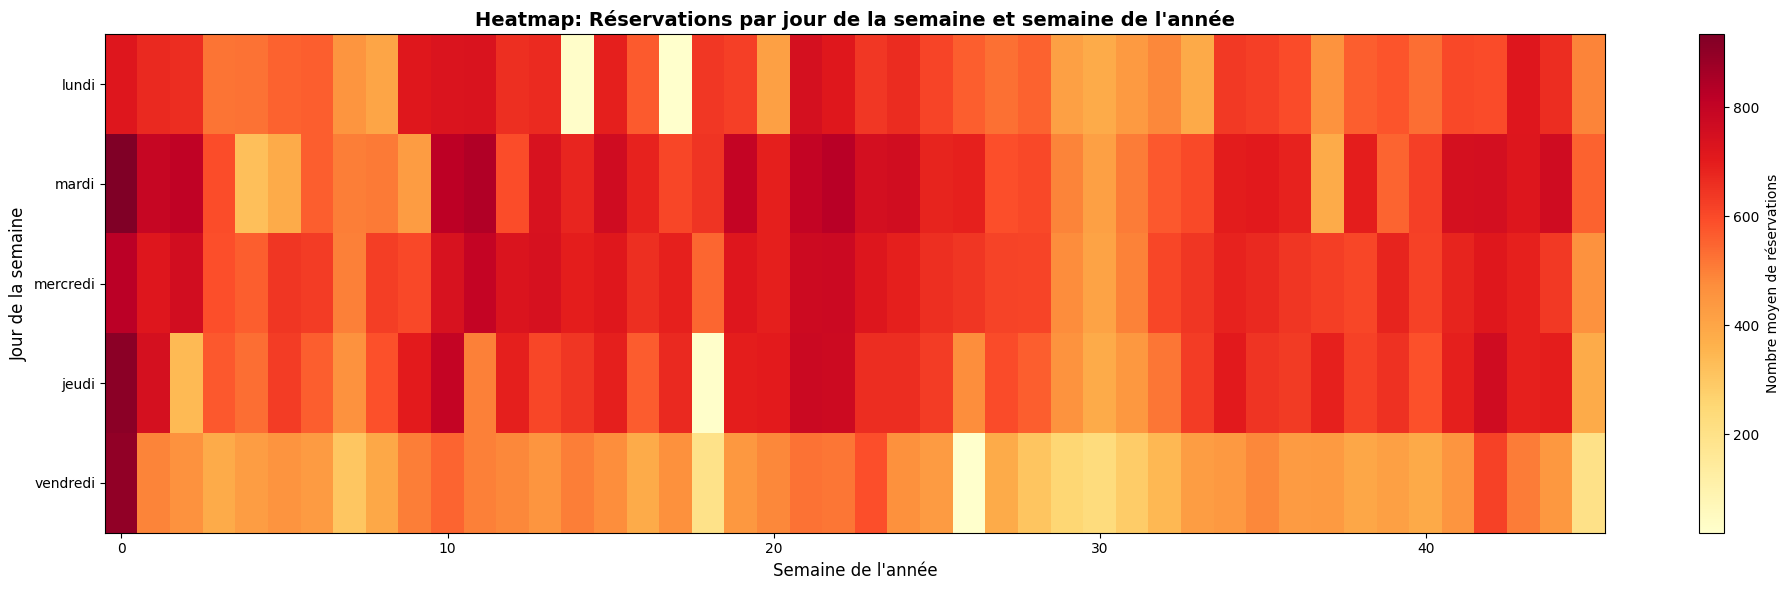

In [8]:
# Visualisation 6: Heatmap - Réservations par jour de semaine et semaine de l'année
pivot_data = df.pivot_table(
    values='GLOBAL', 
    index='jour_semaine', 
    columns='Semaine', 
    aggfunc='mean'
)

# Réordonner les jours de la semaine
jour_ordre = ['lundi', 'mardi', 'mercredi', 'jeudi', 'vendredi']
pivot_data = pivot_data.reindex(jour_ordre)

plt.figure(figsize=(20, 6))
plt.imshow(pivot_data, cmap='YlOrRd', aspect='auto')
plt.colorbar(label='Nombre moyen de réservations')
plt.title('Heatmap: Réservations par jour de la semaine et semaine de l\'année', 
          fontsize=14, fontweight='bold')
plt.xlabel('Semaine de l\'année', fontsize=12)
plt.ylabel('Jour de la semaine', fontsize=12)
plt.yticks(range(len(jour_ordre)), jour_ordre)
plt.tight_layout()
plt.show()

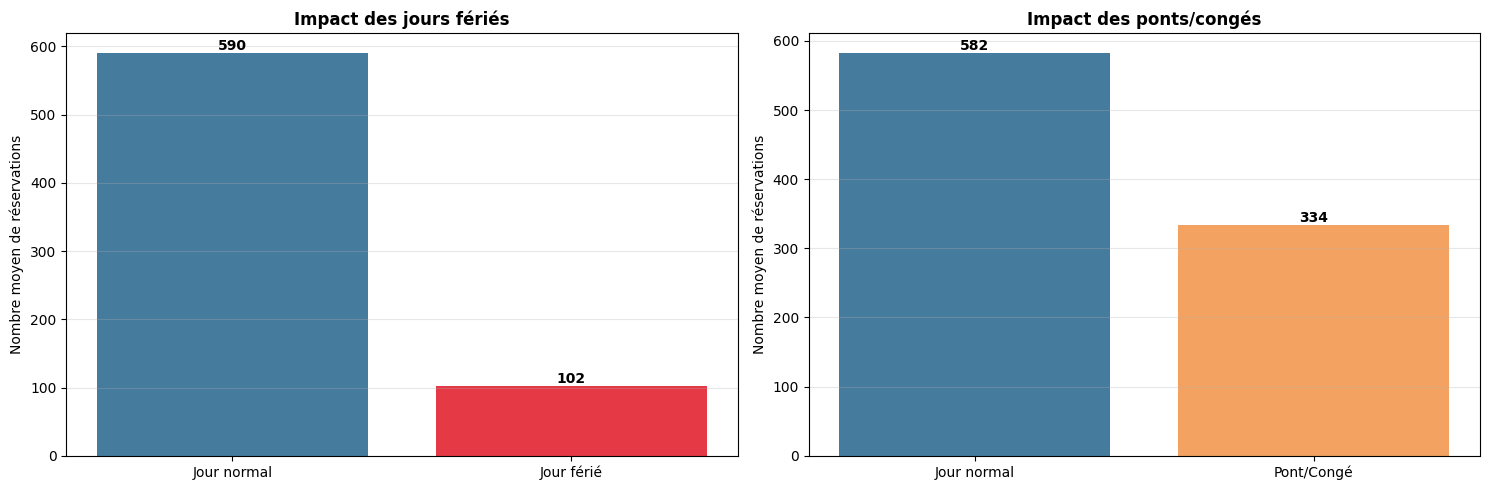

In [9]:
# Visualisation 7: Impact des jours fériés et ponts
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Jours fériés
jour_ferie_stats = df.groupby('jour_ferie.')['GLOBAL'].mean()
axes[0].bar(['Jour normal', 'Jour férié'], jour_ferie_stats.values, 
            color=['#457B9D', '#E63946'])
axes[0].set_title('Impact des jours fériés', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Nombre moyen de réservations', fontsize=10)
axes[0].grid(True, alpha=0.3, axis='y')

# Ponts/Congés
pont_stats = df.groupby('pont.conge.')['GLOBAL'].mean()
axes[1].bar(['Jour normal', 'Pont/Congé'], pont_stats.values, 
            color=['#457B9D', '#F4A261'])
axes[1].set_title('Impact des ponts/congés', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Nombre moyen de réservations', fontsize=10)
axes[1].grid(True, alpha=0.3, axis='y')

# Ajout des valeurs
for ax in axes:
    for bar in ax.patches:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.0f}',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

/var/folders/5q/7s32gsxn5gl7_m0wm2js8xdc0000gn/T/ipykernel_72146/56152790.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot([df['GLOBAL'], df['D1'], df['D2'], df['D3'], df['D4']],


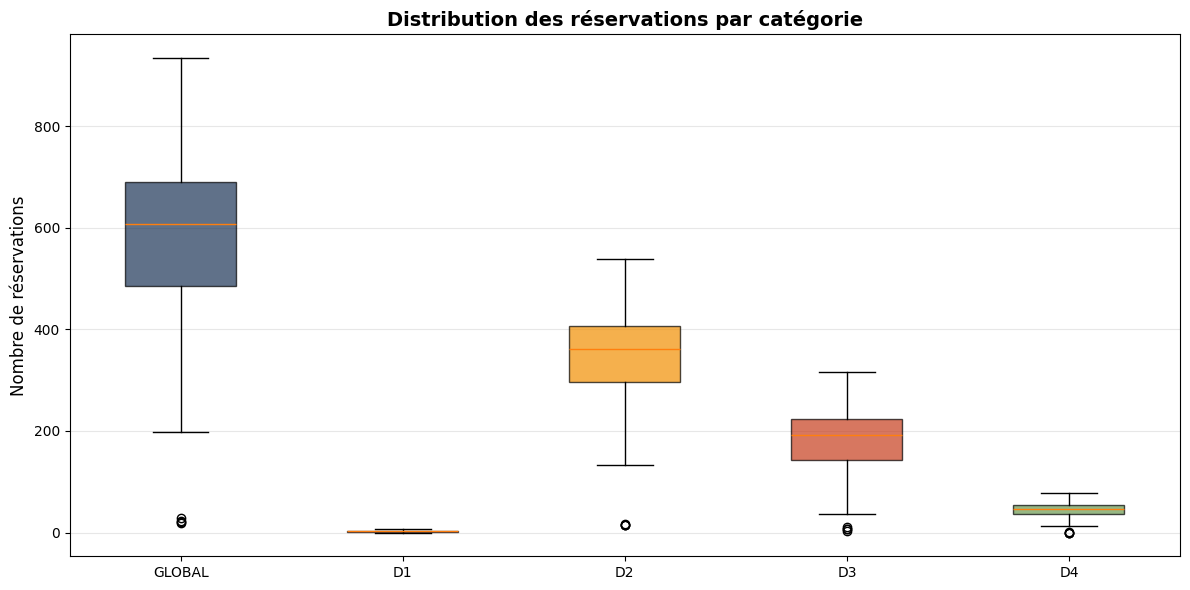


Statistiques descriptives:
           GLOBAL         D1         D2          D3         D4
count  250.000000  250.00000  250.00000  250.000000  250.00000
mean   580.472000    3.41200  348.78800  182.812000   45.46000
std    153.994658    1.61141   89.21473   54.848099   14.58366
min     19.000000    0.00000   14.00000    4.000000    0.00000
25%    484.500000    2.00000  297.25000  143.250000   36.00000
50%    608.000000    4.00000  361.00000  192.000000   47.00000
75%    689.750000    4.00000  407.50000  223.750000   55.00000
max    934.000000    7.00000  539.00000  316.000000   78.00000


In [10]:
# Visualisation 8: Statistiques descriptives des réservations
stats = df[['GLOBAL', 'D1', 'D2', 'D3', 'D4']].describe()

fig, ax = plt.subplots(figsize=(12, 6))
bp = ax.boxplot([df['GLOBAL'], df['D1'], df['D2'], df['D3'], df['D4']], 
                 labels=['GLOBAL', 'D1', 'D2', 'D3', 'D4'],
                 patch_artist=True)

# Coloration des boîtes
colors = ['#1D3557', '#A23B72', '#F18F01', '#C73E1D', '#6A994E']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax.set_title('Distribution des réservations par catégorie', fontsize=14, fontweight='bold')
ax.set_ylabel('Nombre de réservations', fontsize=12)
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("\nStatistiques descriptives:")
print(stats)